In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
image_info = pd.read_csv('./train_data_multiprocess.csv')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
image_info.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win
0,23536,QXJJ094-竖版xy,16,2021-05-01,1.0,194.24,0.0,6.0,0.0,1.0,0.000,32.373333,0.00,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,2021-05-01,3
1,23778,ZDZL1134-横版ZDC,16,2021-05-01,4.0,520.29,0.0,3.0,0.0,1.0,0.000,173.430000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,2021-05-01,3
2,23919,ZDZL1176-横版ZDC,16,2021-05-01,1.0,4036.55,1.0,37.0,341.0,1.0,0.027,109.095946,4036.55,0.0,0.0,0.0,0.0,0.084478,0.2703,1921.0,2021-05-01,3
3,24608,ZDZL1285-竖版ZDC,16,2021-05-01,5.0,698.59,0.0,14.0,0.0,1.0,0.000,49.899286,0.00,0.0,0.0,0.0,0.0,0.000000,0.0714,0.0,2021-05-01,3
4,27485,ZDZL1737-横版LL,16,2021-05-01,3.0,588.04,0.0,5.0,0.0,1.0,0.000,117.608000,0.00,0.0,0.0,0.0,0.0,0.000000,0.2000,0.0,2021-05-01,3


In [6]:
image_info.columns

Index(['image_id', 'image_name', 'media_id', 'image_launch_time',
       'image_source_total_num', 'image_run_date_amount',
       'image_create_role_pay_num', 'image_create_role_num',
       'image_create_role_pay_sum', 'image_source_num',
       'image_create_role_pay_rate', 'image_create_role_cost',
       'image_create_role_pay_cost', 'image_valid_source_num',
       'image_valid_source_rate', 'image_pay_sum_ability',
       'image_pay_num_ability', 'image_create_role_roi',
       'image_create_role_retain_1d', 'create_role_30_pay_sum',
       'model_run_datetime', 'data_win'],
      dtype='object')

In [7]:
image_info['model_run_datetime'].min()

'2021-05-01'

In [8]:
image_info['model_run_datetime'].max()

'2022-01-01'

In [9]:
image_info.shape

(4767, 22)

In [10]:
image_info['image_id'].nunique()

332

In [11]:
image_info['image_30_roi'] = image_info['create_role_30_pay_sum'] / image_info['image_run_date_amount']

In [16]:
image_info.corr()['image_30_roi'].sort_values(ascending=False)

image_30_roi                   1.000000
create_role_30_pay_sum         0.222619
image_create_role_roi          0.083463
image_create_role_pay_rate     0.038486
image_valid_source_rate        0.037098
image_create_role_retain_1d    0.030522
image_create_role_pay_sum      0.021163
image_pay_sum_ability          0.020010
image_valid_source_num         0.019891
image_id                       0.015924
image_source_total_num         0.014429
image_pay_num_ability          0.006717
image_create_role_pay_num      0.006666
image_create_role_pay_cost     0.003465
media_id                       0.003170
image_create_role_num          0.002656
image_run_date_amount          0.001216
image_source_num               0.001099
image_create_role_cost        -0.002151
data_win                            NaN
Name: image_30_roi, dtype: float64

In [17]:
image_info['label'] = image_info['image_30_roi'].apply(lambda x:1 if x>=0.4 else(0 if x<0.25 else 2))

In [18]:
image_info_label = image_info[image_info['label']!=2]

## EDA

In [19]:
image_info_label.shape

(4206, 24)

In [20]:
image_info_label = image_info_label[image_info_label['image_run_date_amount']>=500]

In [21]:
image_info_label.shape

(2752, 24)

In [22]:
image_info_label.nunique().sort_values()

data_win                          1
label                             2
media_id                          2
image_valid_source_num           14
image_source_num                 15
image_source_total_num           30
image_valid_source_rate          39
image_create_role_pay_num        67
image_launch_time                80
image_pay_num_ability           141
model_run_datetime              224
image_id                        268
image_name                      268
image_create_role_num           351
image_create_role_pay_rate      540
image_pay_sum_ability           699
image_create_role_pay_sum       703
image_create_role_retain_1d     737
create_role_30_pay_sum         1101
image_create_role_roi          1728
image_create_role_pay_cost     1750
image_30_roi                   2064
image_create_role_cost         2680
image_run_date_amount          2708
dtype: int64

In [23]:
image_info_label.drop(['data_win','image_30_roi'], axis=1, inplace=True)

In [24]:
image_info_label['image_valid_source_num'].value_counts()

0.0     1318
1.0      864
2.0      265
3.0      114
4.0       66
5.0       59
6.0       33
7.0       14
10.0       5
8.0        4
11.0       4
9.0        4
13.0       1
12.0       1
Name: image_valid_source_num, dtype: int64

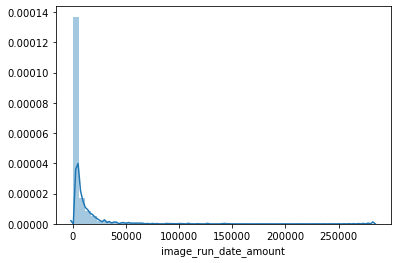

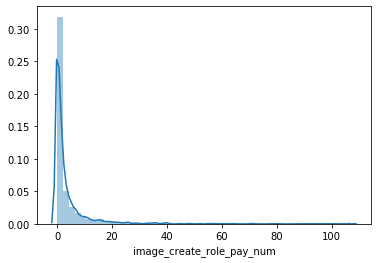

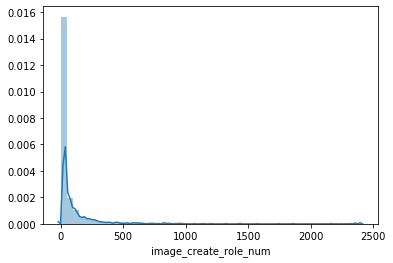

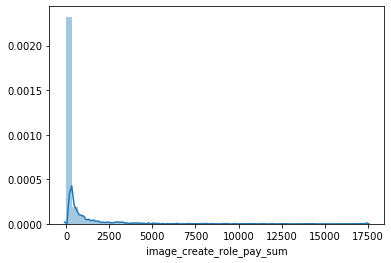

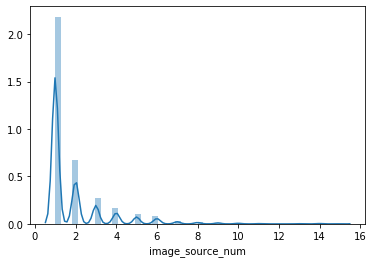

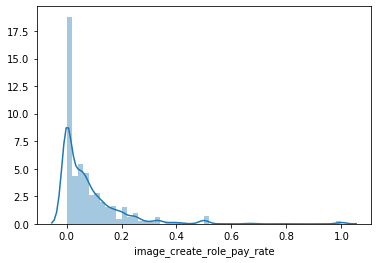

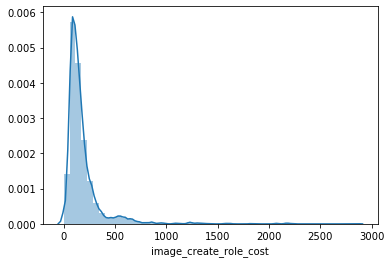

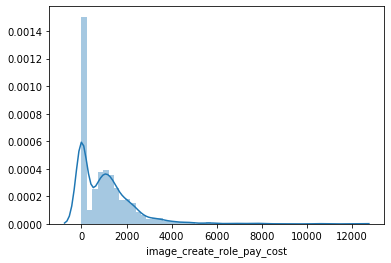

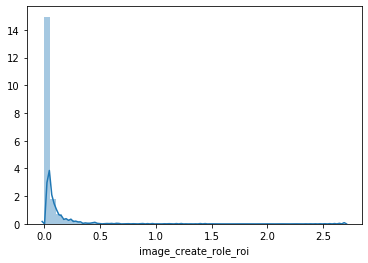

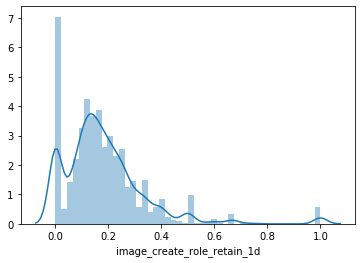

In [25]:
columns = ['image_run_date_amount', 'image_create_role_pay_num',
       'image_create_role_num', 'image_create_role_pay_sum',
       'image_source_num', 'image_create_role_pay_rate',
       'image_create_role_cost', 'image_create_role_pay_cost',
       'image_create_role_roi', 'image_create_role_retain_1d']
for col in columns:
    sns.distplot(image_info_label[col])
    plt.show()

In [26]:
image_info_label[image_info_label['image_create_role_cost']>=800].shape

(44, 22)

In [27]:
image_info_label = image_info_label[image_info_label['image_create_role_cost']<800]

In [28]:
image_info_label['image_create_role_cost'].replace(0,float('inf'),inplace=True)

In [29]:
image_info_label['image_create_role_pay_cost'].replace(0,float('inf'),inplace=True)

In [30]:
image_info_label['image_create_role_pay_cost'].value_counts().sort_index()

1.726950e+02      1
2.321000e+02      1
2.483133e+02      1
2.676475e+02      1
2.799700e+02      1
               ... 
1.046523e+04      1
1.058400e+04      1
1.062117e+04      1
1.200344e+04      1
inf             955
Name: image_create_role_pay_cost, Length: 1743, dtype: int64

In [31]:
image_info_label = image_info_label[image_info_label['image_create_role_pay_cost']>1000]

In [32]:
image_info_label.shape

(2189, 22)

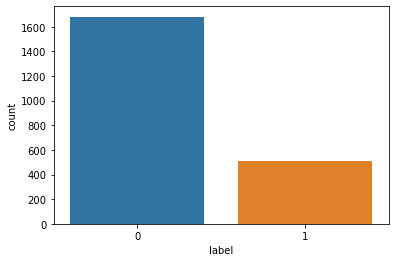

In [33]:
sns.countplot(x='label',data=image_info_label)
plt.show()

In [34]:
#多变量分析
image_info_label.corr()

,image_id,media_id,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,label
image_id,1.000000,-0.095467,0.073146,0.152460,0.142095,0.133976,0.102450,0.185609,-0.005909,-0.027129,0.058501,0.101052,0.034044,0.062168,0.100123,-0.010267,-0.030498,0.020992,0.034175
media_id,-0.095467,1.000000,0.016231,-0.557687,-0.376980,-0.436231,-0.340866,0.035480,0.004856,0.028293,-0.090887,0.018111,-0.004164,-0.135399,-0.266744,-0.009639,0.015371,-0.080496,0.035322
image_source_total_num,0.073146,0.016231,1.000000,0.221085,0.286118,0.231119,0.197698,0.369711,0.099805,-0.146275,-0.073900,0.346383,0.203003,0.168015,0.184558,0.046515,-0.009591,0.247045,0.191442
image_run_date_amount,0.152460,-0.557687,0.221085,1.000000,0.913166,0.932189,0.821462,0.107562,0.086361,-0.172637,0.031726,0.179154,0.158744,0.459993,0.551633,0.107227,-0.033406,0.553405,0.211380
image_create_role_pay_num,0.142095,-0.376980,0.286118,0.913166,1.000000,0.913243,0.818530,0.132767,0.172322,-0.190284,-0.153756,0.281749,0.284557,0.642788,0.757478,0.146725,0.000219,0.593587,0.284258
image_create_role_num,0.133976,-0.436231,0.231119,0.932189,0.913243,1.000000,0.771061,0.109018,0.025487,-0.232175,-0.016685,0.177996,0.164965,0.426283,0.559365,0.099852,-0.064305,0.569321,0.228405
image_create_role_pay_sum,0.102450,-0.340866,0.197698,0.821462,0.818530,0.771061,1.000000,0.114731,0.129232,-0.123462,-0.081413,0.197000,0.168698,0.615616,0.501537,0.345441,0.003301,0.653431,0.317264
image_source_num,0.185609,0.035480,0.369711,0.107562,0.132767,0.109018,0.114731,1.000000,0.079738,-0.122440,-0.031614,0.617360,0.092454,-0.022143,-0.039525,0.071563,-0.045700,0.132568,0.145757
image_create_role_pay_rate,-0.005909,0.004856,0.099805,0.086361,0.172322,0.025487,0.129232,0.079738,1.000000,0.154197,-0.387354,0.327114,0.504879,0.189146,0.192113,0.269201,0.261835,0.076803,0.208435
image_create_role_cost,-0.027129,0.028293,-0.146275,-0.172637,-0.190284,-0.232175,-0.123462,-0.122440,0.154197,1.000000,0.002087,-0.146690,-0.154524,-0.083918,-0.134564,-0.042590,0.242829,-0.151154,-0.126953


In [35]:
#特征选择,woe分箱
from scipy import stats
def monoto_bin(Y, X, n = 20):
    r = 0
    total_bad = Y.sum()
    total_good =Y.count()-total_bad  
    while np.abs(r) < 0.9:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n,duplicates='raise')})
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
#     print(r)
#     print(n)
    d3 = pd.DataFrame(d2.min().X, columns = ['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    #d3[Y.name + '_rate'] = d2.mean().Y
    d3['badattr']=d3[Y.name]/total_bad
    d3['goodattr']=(d3['total']-d3[Y.name])/total_good
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min_' + X.name)).reset_index(drop = True)
    print ("=" * 80)
    cut = []
    cut.append(float('-inf'))
    for i in range(1,n+1):
        qua =X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return d4,iv,cut,woe

In [36]:
dfx1,ivx1,cutx1,woex1 = monoto_bin(image_info_label['label'],image_info_label['image_run_date_amount'],n=10)
# dfx2,ivx2,cutx2,woex2 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_num'],n=10)
dfx3,ivx3,cutx3,woex3 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_num'],n=10)
# dfx4,ivx4,cutx4,woex4 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_sum'],n=10)
# dfx5,ivx5,cutx5,woex5 = monoto_bin(image_info_label['label'],image_info_label['image_source_num'],n=10)
# dfx6,ivx6,cutx6,woex6 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_rate'],n=10)
dfx7,ivx7,cutx7,woex7 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_cost'],n=10)
# dfx8,ivx8,cutx8,woex8 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_cost'],n=10)
# dfx9,ivx9,cutx9,woex9 = monoto_bin(image_info_label['label'],image_info_label['image_valid_source_rate'],n=10)
# dfx10,ivx10,cutx10,woex10 = monoto_bin(image_info_label['label'],image_info_label['image_pay_sum_ability'],n=10)
# dfx11,ivx11,cutx11,woex11 = monoto_bin(image_info_label['label'],image_info_label['image_pay_num_ability'],n=10)
# dfx12,ivx12,cutx12,woex12 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_roi'],n=10)
# dfx13,ivx13,cutx13,woex13 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_retain_1d'],n=10)

[1.047, 1.047, 1.278, 0.463, 0.497, -0.01, -0.005, -0.585, -0.624, -1.426]


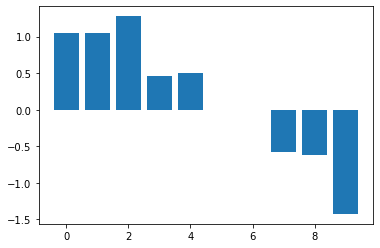

[1.109, 1.129, 0.611, 0.424, 0.646, 0.225, -0.409, -0.496, -0.497, -1.409]


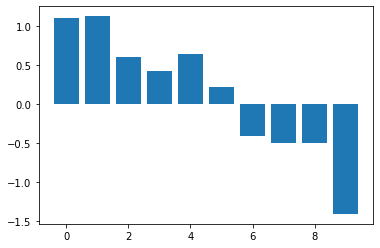

[-0.128, -0.334, -0.312, -0.441, 0.021, -0.158, 0.302, 0.128, 0.569, 0.723]


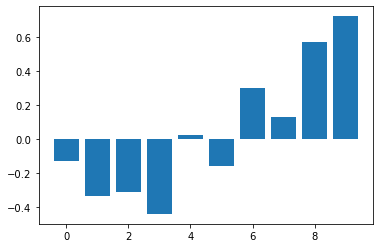

In [37]:
woex = [woex1,woex3,woex7]
for col in woex:
    print('{}'.format(col))
    plt.bar(range(len(col)),col)
    plt.show()

In [38]:
def self_bin(Y, X, bin):
    r = 0
    total_bad = Y.sum()
    total_good =Y.count()-total_bad  
    d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.cut(X, bin)})
    d2 = d1.groupby('Bucket', as_index = True)
    r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        
    d3 = pd.DataFrame(d2.min().X, columns = ['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    #d3[Y.name + '_rate'] = d2.mean().Y
    #好坏比，求woe,证据权重，自变量对目标变量有没有影响，什么影响
    d3['badattr']=d3[Y.name]/total_bad
    d3['goodattr']=(d3['total']-d3[Y.name])/total_good
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])
    #iv，信息值，自变量对于目标变量的影响程度
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min_' + X.name)).reset_index(drop = True)
    print ("=" * 80)
#     print (d4)
    woe = list(d4['woe'].round(3))
    return d4,iv,woe

In [88]:
pinf = float('inf')#正无穷大
ninf = float('-inf')#负无穷大
cutx2 = [ninf, 1, 3, 8, 12,50,pinf]
cutx4 = [ninf,12,60,200,700,2000,5000,pinf]
cutx5 = [ninf,1,2,3,5,8,pinf]
cutx6 = [ninf,0.005,0.01,0.015,0.02,pinf]
cutx8 = [ninf, 2000,3000, 4000,5000,6000,7000,8000,pinf]
cutx9 = [ninf, 0.2, 0.6,0.9,pinf]
cutx10 = [ninf, 20,40, 100,200, 400, pinf]
cutx11 = [ninf, 1,2,5,10,20,pinf]
cutx12 = [ninf, 0.005,0.01,0.015,0.02,0.025,0.05,pinf]
cutx13 = [ninf, 0.06,0.1,0.14,0.2,0.3,pinf]

In [85]:
image_info_label['image_create_role_pay_cost'].describe()

count    2189.00000
mean            inf
std             NaN
min      1000.20000
25%      1552.90875
50%      3241.33000
75%             NaN
max             inf
Name: image_create_role_pay_cost, dtype: float64

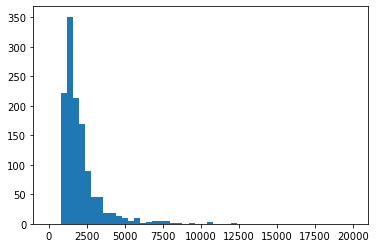

In [87]:
plt.hist(image_info_label['image_create_role_pay_cost'],bins=50,range=(0,20000))
plt.show()

In [89]:
dfx2,ivx2,woex2 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_num'],cutx2)
dfx4,ivx4,woex4 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_sum'],cutx4)
dfx5,ivx5,woex5 = self_bin(image_info_label['label'],image_info_label['image_source_num'],cutx5)
dfx6,ivx6,woex6 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_rate'],cutx6)
dfx8,ivx8,woex8 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_cost'],cutx8)
dfx9,ivx9,woex9 = self_bin(image_info_label['label'],image_info_label['image_valid_source_rate'],cutx9)
dfx10,ivx10,woex10 = self_bin(image_info_label['label'],image_info_label['image_pay_sum_ability'],cutx10)
dfx11,ivx11,woex11 = self_bin(image_info_label['label'],image_info_label['image_pay_num_ability'],cutx11)
dfx12,ivx12,woex12 = self_bin(image_info_label['label'],image_info_label['image_create_role_roi'],cutx12)
dfx13,ivx13,woex13 = self_bin(image_info_label['label'],image_info_label['image_create_role_retain_1d'],cutx13)

In [90]:
for i in range(1,14):
    exec("print('woex%s =',woex%s)"%(i,i))

woex1 = [1.047, 1.047, 1.278, 0.463, 0.497, -0.01, -0.005, -0.585, -0.624, -1.426]
woex2 = [0.707, -0.28, -0.791, -0.801, -1.795, -1.803]
woex3 = [1.109, 1.129, 0.611, 0.424, 0.646, 0.225, -0.409, -0.496, -0.497, -1.409]
woex4 = [1.093, 0.152, -0.263, -0.909, -1.932, -2.258, -2.723]
woex5 = [0.243, 0.007, -0.284, -0.837, -0.699, -0.686]
woex6 = [1.182, 0.749, -0.185, -0.568, -0.571]
woex7 = [-0.128, -0.334, -0.312, -0.441, 0.021, -0.158, 0.302, 0.128, 0.569, 0.723]
woex8 = [-0.757, -0.214, -0.022, -0.429, 0.595, -0.974, -0.686, 1.191]
woex9 = [0.816, -0.707, -0.703, -0.735]
woex10 = [0.641, 0.135, -0.372, -0.775, -1.375, -2.061]
woex11 = [0.442, -0.849, -0.645, -1.304, -1.618, -1.934]
woex12 = [1.02, 0.381, 0.846, -0.241, 0.173, -0.639, -1.992]
woex13 = [1.717, 0.662, -0.528, -0.338, -0.344, -0.319]


In [91]:
for i in range(1,14):
    exec("print('cutx%s =',cutx%s)"%(i,i))

cutx1 = [-inf, 626.314, 818.768, 1129.172, 1494.544, 2125.82, 3057.808, 4600.364, 8104.098, 15747.532, inf]
cutx2 = [-inf, 1, 3, 8, 12, 50, inf]
cutx3 = [-inf, 3.0, 5.0, 7.0, 11.0, 16.0, 25.0, 40.0, 75.0, 176.0, inf]
cutx4 = [-inf, 12, 60, 200, 700, 2000, 5000, inf]
cutx5 = [-inf, 1, 2, 3, 5, 8, inf]
cutx6 = [-inf, 0.005, 0.01, 0.015, 0.02, inf]
cutx7 = [-inf, 67.057, 83.3311, 97.2183, 114.7394, 133.37, 155.4077, 185.0767, 236.536, 343.5266, inf]
cutx8 = [-inf, 2000, 3000, 4000, 5000, 6000, 7000, 8000, inf]
cutx9 = [-inf, 0.2, 0.6, 0.9, inf]
cutx10 = [-inf, 20, 40, 100, 200, 400, inf]
cutx11 = [-inf, 1, 2, 5, 10, 20, inf]
cutx12 = [-inf, 0.005, 0.01, 0.015, 0.02, 0.025, 0.05, inf]
cutx13 = [-inf, 0.06, 0.1, 0.14, 0.2, 0.3, inf]


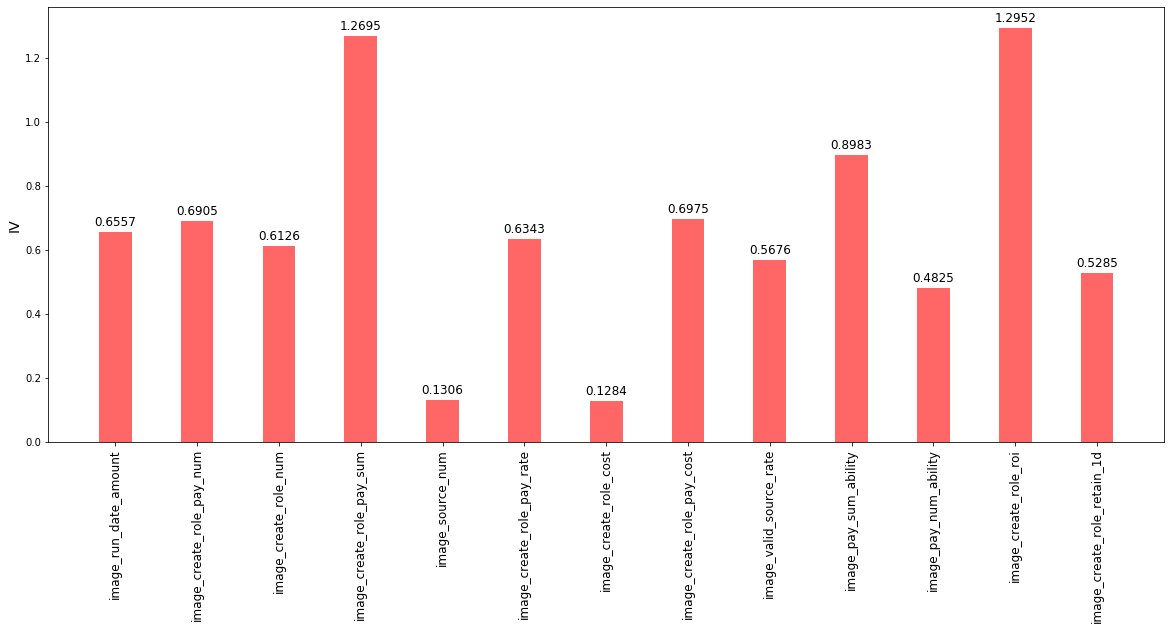

In [92]:
y=[ivx1,ivx2,ivx3,ivx4,ivx5,ivx6,ivx7,ivx8,ivx9,ivx10,ivx11,ivx12,ivx13]
index=['image_run_date_amount', 'image_create_role_pay_num',
       'image_create_role_num', 'image_create_role_pay_sum',
       'image_source_num', 'image_create_role_pay_rate',
       'image_create_role_cost', 'image_create_role_pay_cost','image_valid_source_rate',
       'image_pay_sum_ability', 'image_pay_num_ability',
       'image_create_role_roi','image_create_role_retain_1d']
fig= plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(range(1,14), y, width=0.4,color = 'r',alpha = 0.6)#生成柱状图
ax1.set_xticks(range(1,14))
ax1.set_xticklabels(index, rotation=90, fontsize=12)
ax1.set_ylabel('IV', fontsize=14)
#在柱状图上添加数字标签
for i, v in enumerate(y):
    plt.text(i+1, v+0.01, '%.4f' % v, ha='center', va='bottom', fontsize=12)
plt.show()

In [93]:
select_feature = ['image_run_date_amount', 'image_create_role_pay_num',
       'image_create_role_num', 'image_create_role_pay_sum',
       'image_source_num', 'image_create_role_pay_rate',
       'image_create_role_cost', 'image_create_role_pay_cost',
       'image_valid_source_rate',
       'image_pay_sum_ability', 'image_pay_num_ability',
       'image_create_role_roi', 'label']

In [94]:
len(select_feature)

13

In [95]:
def change_woe(d,cut,woe):
    """
    将每个样本对应特征值更换为woe值
    """
    list1=[]
    i=0
    while i<len(d):
        value=d.values[i]
        j=len(cut)-2
        m=len(cut)-2
        while j>=0:
            if value>=cut[j]:
                j=-1
            else:
                j -=1
                m -= 1
        list1.append(woe[m])
        i += 1
    return list1

In [96]:
image_info_change = image_info_label.copy()

In [97]:
pinf = float('inf')#正无穷大
ninf = float('-inf')#负无穷大
woex1 = [1.047, 1.047, 1.278, 0.463, 0.497, -0.01, -0.005, -0.585, -0.624, -1.426]
woex2 = [0.707, -0.28, -0.791, -0.801, -1.795, -1.803]
woex3 = [1.109, 1.129, 0.611, 0.424, 0.646, 0.225, -0.409, -0.496, -0.497, -1.409]
woex4 = [1.093, 0.152, -0.263, -0.909, -1.932, -2.258, -2.723]
woex5 = [0.243, 0.007, -0.284, -0.837, -0.699, -0.686]
woex6 = [1.182, 0.749, -0.185, -0.568, -0.571]
woex7 = [-0.128, -0.334, -0.312, -0.441, 0.021, -0.158, 0.302, 0.128, 0.569, 0.723]
woex8 = [-0.757, -0.214, -0.022, -0.429, 0.595, -0.974, -0.686, 1.191]
woex9 = [0.816, -0.707, -0.703, -0.735]
woex10 = [0.641, 0.135, -0.372, -0.775, -1.375, -2.061]
woex11 = [0.442, -0.849, -0.645, -1.304, -1.618, -1.934]
woex12 = [1.02, 0.381, 0.846, -0.241, 0.173, -0.639, -1.992]
woex13 = [1.717, 0.662, -0.528, -0.338, -0.344, -0.319]

cutx1 = [ninf, 626.314, 818.768, 1129.172, 1494.544, 2125.82, 3057.808, 4600.364, 8104.098, 15747.532, ninf]
cutx2 = [ninf, 1, 3, 8, 12, 50, ninf]
cutx3 = [ninf, 3.0, 5.0, 7.0, 11.0, 16.0, 25.0, 40.0, 75.0, 176.0, ninf]
cutx4 = [ninf, 12, 60, 200, 700, 2000, 5000, ninf]
cutx5 = [ninf, 1, 2, 3, 5, 8, ninf]
cutx6 = [ninf, 0.005, 0.01, 0.015, 0.02, ninf]
cutx7 = [ninf, 67.057, 83.3311, 97.2183, 114.7394, 133.37, 155.4077, 185.0767, 236.536, 343.5266, ninf]
cutx8 = [ninf, 2000, 3000, 4000, 5000, 6000, 7000, 8000, ninf]
cutx9 = [ninf, 0.2, 0.6, 0.9, ninf]
cutx10 = [ninf, 20, 40, 100, 200, 400, ninf]
cutx11 = [ninf, 1, 2, 5, 10, 20, ninf]
cutx12 = [ninf, 0.005, 0.01, 0.015, 0.02, 0.025, 0.05, ninf]
cutx13 = [ninf, 0.06, 0.1, 0.14, 0.2, 0.3, ninf]

In [98]:
#数据转化
image_info_change['image_run_date_amount'] = change_woe(image_info_change['image_run_date_amount'], cutx1, woex1)
image_info_change['image_create_role_pay_num'] = change_woe(image_info_change['image_create_role_pay_num'], cutx2, woex2)
image_info_change['image_create_role_num'] = change_woe(image_info_change['image_create_role_num'], cutx3, woex3)
image_info_change['image_create_role_pay_sum'] = change_woe(image_info_change['image_create_role_pay_sum'], cutx4, woex4)
image_info_change['image_source_num'] = change_woe(image_info_change['image_source_num'], cutx5, woex5)
image_info_change['image_create_role_pay_rate'] = change_woe(image_info_change['image_create_role_pay_rate'], cutx6, woex6)
image_info_change['image_create_role_cost'] = change_woe(image_info_change['image_create_role_cost'], cutx7, woex7)
image_info_change['image_create_role_pay_cost'] = change_woe(image_info_change['image_create_role_pay_cost'], cutx8, woex8)
image_info_change['image_valid_source_rate'] = change_woe(image_info_change['image_valid_source_rate'], cutx9, woex9)
image_info_change['image_pay_sum_ability'] = change_woe(image_info_change['image_pay_sum_ability'], cutx10, woex10)
image_info_change['image_pay_num_ability'] = change_woe(image_info_change['image_pay_num_ability'], cutx11, woex11)
image_info_change['image_create_role_roi'] = change_woe(image_info_change['image_create_role_roi'], cutx12, woex12)

In [99]:
image_info_change.shape

(2189, 22)

In [100]:
image_info_change.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,label
1,23778,ZDZL1134-横版ZDC,16,2021-05-01,4.0,1.047,0.707,1.129,1.093,0.007,1.182,0.302,1.191,0.0,0.816,0.641,0.442,1.020,0.0000,0.0,2021-05-01,0
2,23919,ZDZL1176-横版ZDC,16,2021-05-01,1.0,-0.005,-0.280,-0.409,-0.909,0.007,-0.571,-0.441,-0.429,0.0,0.816,0.641,0.442,-1.992,0.2703,1921.0,2021-05-01,1
3,24608,ZDZL1285-竖版ZDC,16,2021-05-01,5.0,1.047,0.707,0.646,1.093,0.007,1.182,-0.128,1.191,0.0,0.816,0.641,0.442,1.020,0.0714,0.0,2021-05-01,0
4,27485,ZDZL1737-横版LL,16,2021-05-01,3.0,1.047,0.707,0.611,1.093,0.007,1.182,0.021,1.191,0.0,0.816,0.641,0.442,1.020,0.2000,0.0,2021-05-01,0
5,28057,ZDZL1827-横版LL,16,2021-05-01,5.0,-0.005,-0.791,-0.496,0.152,0.007,-0.571,-0.334,-0.757,1.0,-0.735,0.641,-0.645,0.381,0.2653,85.0,2021-05-01,0


In [262]:
# image_info_change.to_csv('./image_info_change.csv',index=0)

In [101]:
data_info = image_info_change[select_feature]

In [102]:
data_info.shape

(2189, 13)

In [103]:
#模型建立
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, roc_auc_score,auc, classification_report

In [104]:
x_train, x_test, y_train, y_test = train_test_split(data_info.drop('label',axis=1), data_info['label'], test_size=0.25, random_state=42)

### RF

In [105]:
RF = RandomForestClassifier()
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 100, 150],
           "max_depth" : [2,3,5,7,9],
           "min_samples_leaf" : [2, 4, 6, 8]}
RF_random = RandomizedSearchCV(RF, param_distributions=param_grid, cv=5)
RF_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 5, 7, 9],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'n_estimators': [9, 18, 27, 36, 100,
                                                         150]})

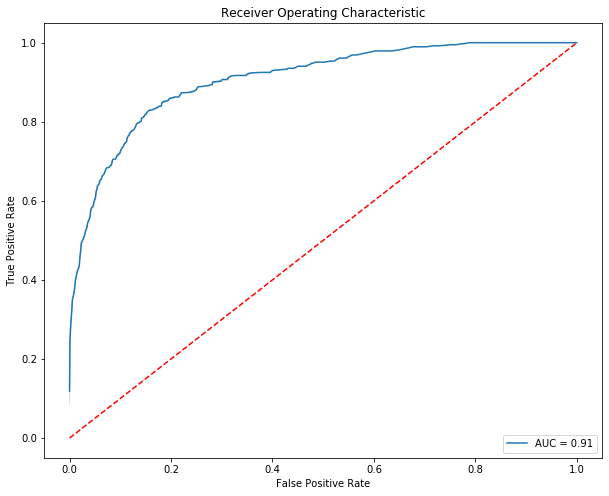

In [106]:
# 训练集评估
best_est_RF = RF_random.best_estimator_
y_pred = best_est_RF.predict_proba(x_train)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

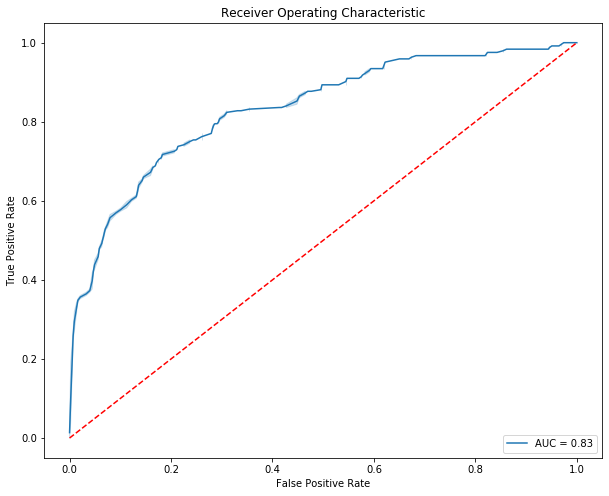

In [107]:
# 测试集评估
best_est_RF = RF_random.best_estimator_
y_pred = best_est_RF.predict_proba(x_test)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [108]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       426
           1       0.57      0.61      0.59       122

    accuracy                           0.81       548
   macro avg       0.73      0.74      0.74       548
weighted avg       0.82      0.81      0.81       548



In [109]:
import joblib
joblib.dump(best_est_RF, 'best_est_RF_tk.pkl')

['best_est_RF_tk.pkl']

#### XGB

In [110]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_jobs=-1) 
 
param_grid = {
                  'n_estimators' :[100,150,200,250,300],
                  "learning_rate" : [0.001,0.01,0.0001,0.05, 0.10 ],
                  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3 ],
                  "colsample_bytree" : [0.5,0.7],
                  'max_depth': [3,4,6,8,10,12,15,20,25,30]
              }
XGB_random = RandomizedSearchCV(XGB, param_distributions=param_grid, cv=5)
XGB_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

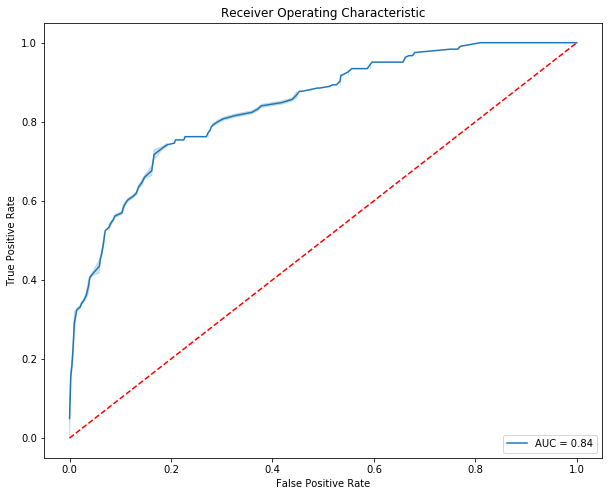

In [111]:
# 测试集评估
best_est_XGB = XGB_random.best_estimator_
y_pred = best_est_XGB.predict_proba(x_test)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [112]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.77      0.83       426
           1       0.48      0.76      0.59       122

    accuracy                           0.76       548
   macro avg       0.70      0.76      0.71       548
weighted avg       0.82      0.76      0.78       548



In [113]:
joblib.dump(best_est_XGB, 'best_est_XGB_tk.pkl')

['best_est_XGB_tk.pkl']

#### LGB

In [114]:
from lightgbm import LGBMClassifier

In [115]:
LGB = LGBMClassifier(boosting_type='gbdt',objective = 'binary',metric = 'auc',n_jobs=-1) 
param_grid = {
              'max_depth': [15, 20, 25, 30, 35],
              'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
              'feature_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              'bagging_freq': [2, 4, 5, 6, 8],
              'lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
              'lambda_l2': [0, 10, 15, 35, 40],
              'cat_smooth': [1, 10, 15, 20, 35]
}
LGB_random = RandomizedSearchCV(LGB, param_distributions=param_grid, cv=5)
LGB_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(metric='auc', objective='binary'),
                   param_distributions={'bagging_fraction': [0.6, 0.7, 0.8, 0.9,
                                                             0.95],
                                        'bagging_freq': [2, 4, 5, 6, 8],
                                        'cat_smooth': [1, 10, 15, 20, 35],
                                        'feature_fraction': [0.6, 0.7, 0.8, 0.9,
                                                             0.95],
                                        'lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
                                        'lambda_l2': [0, 10, 15, 35, 40],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.15],
                                        'max_depth': [15, 20, 25, 30, 35]})

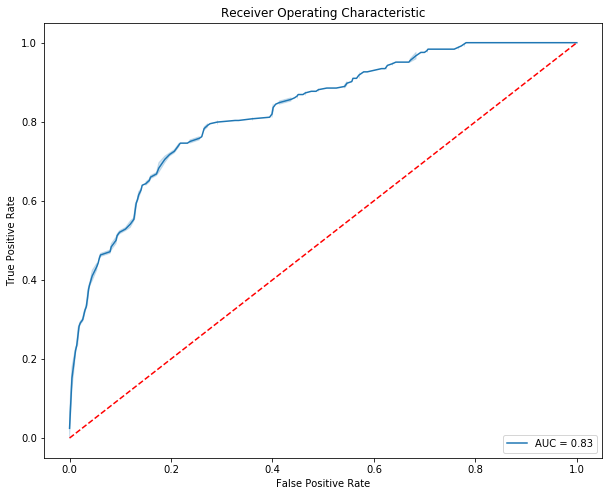

In [116]:
# 测试集评估
best_est_LGB = LGB_random.best_estimator_
y_pred = best_est_LGB.predict_proba(x_test)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [117]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       426
           1       0.56      0.57      0.56       122

    accuracy                           0.80       548
   macro avg       0.72      0.72      0.72       548
weighted avg       0.80      0.80      0.80       548



In [118]:
joblib.dump(best_est_LGB, 'best_est_LGB_tk.pkl')

['best_est_LGB_tk.pkl']

### 三模型融合

In [119]:
y_pred = 0.4* best_est_XGB.predict_proba(x_test)[:,1] + 0.3*best_est_LGB.predict_proba(x_test)[:,1] + 0.3*best_est_RF.predict_proba(x_test)[:,1]

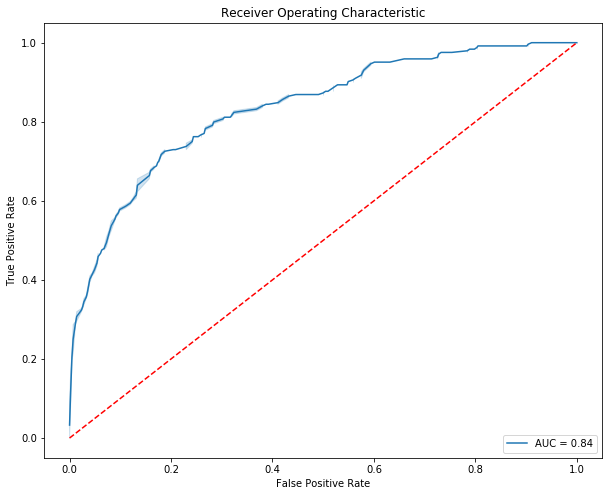

In [120]:
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [121]:
y_pred_class = list(map(lambda x:1 if x>=0.3 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       426
           1       0.51      0.73      0.60       122

    accuracy                           0.78       548
   macro avg       0.71      0.76      0.73       548
weighted avg       0.82      0.78      0.80       548



In [122]:
image_info_change.shape

(2189, 22)

In [123]:
feature = image_info_change[select_feature].drop('label',axis=1)
image_info_change['pred'] = 0.4* best_est_XGB.predict_proba(feature)[:,1] + 0.3*best_est_LGB.predict_proba(feature)[:,1] + 0.3*best_est_RF.predict_proba(feature)[:,1]

In [124]:
y_pred_class = list(map(lambda x:1 if x>=0.3 else 0, image_info_change['pred']))
print(classification_report(image_info_change['label'], y_pred_class))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1681
           1       0.58      0.80      0.67       508

    accuracy                           0.82      2189
   macro avg       0.76      0.81      0.77      2189
weighted avg       0.85      0.82      0.83      2189



In [125]:
def Prob2Score(prob, basePoint=600, PDO=30):
    #将概率转化成分数且为正整数
    y = np.log(prob/(1-prob))
    return (basePoint+int(PDO/np.log(2)*(y)))

In [126]:
image_info_change['score'] = image_info_change['pred'].apply(Prob2Score)

In [127]:
image_info_label['score'] = image_info_change['score']

In [128]:
image_info_label.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,label,score
1,23778,ZDZL1134-横版ZDC,16,2021-05-01,4.0,520.29,0.0,3.0,0.0,1.0,0.0000,173.430000,inf,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,2021-05-01,0,515
2,23919,ZDZL1176-横版ZDC,16,2021-05-01,1.0,4036.55,1.0,37.0,341.0,1.0,0.0270,109.095946,4036.55,0.0,0.0,0.0,0.0,0.084478,0.2703,1921.0,2021-05-01,1,622
3,24608,ZDZL1285-竖版ZDC,16,2021-05-01,5.0,698.59,0.0,14.0,0.0,1.0,0.0000,49.899286,inf,0.0,0.0,0.0,0.0,0.000000,0.0714,0.0,2021-05-01,0,517
4,27485,ZDZL1737-横版LL,16,2021-05-01,3.0,588.04,0.0,5.0,0.0,1.0,0.0000,117.608000,inf,0.0,0.0,0.0,0.0,0.000000,0.2000,0.0,2021-05-01,0,512
5,28057,ZDZL1827-横版LL,16,2021-05-01,5.0,3503.07,3.0,48.0,18.0,1.0,0.0625,72.980625,1167.69,1.0,1.0,18.0,3.0,0.005138,0.2653,85.0,2021-05-01,0,530


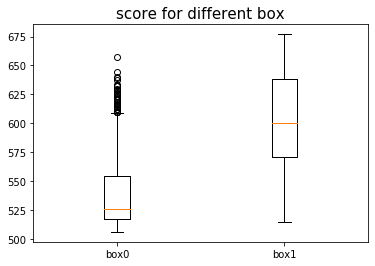

In [130]:
box0 = image_info_label[image_info_label['label']==0]['score']
box1 = image_info_label[image_info_label['label']==1]['score']
plt.title('score for different box',fontsize=15)
labels = 'box0','box1'
plt.boxplot([box0,box1],labels=labels)
plt.show()

In [132]:
print('高分区ROI：',image_info_label[image_info_label['score']>=520]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']>=520]['image_run_date_amount'].sum())
print('低分区ROI：',image_info_label[image_info_label['score']<520]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']<520]['image_run_date_amount'].sum())

高分区ROI： 0.6006115248373041
低分区ROI： 0.0775747391326759
